# SYDE 556/750 --- Assignment 2
**Student ID: 21050969**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_02/syde556_assignment_02.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

In [2]:
def generate_signal(T, dt, rms,limit, seed):  
    np.random.seed(seed)    
    ts = np.arange(0,T,dt)
    N = len(ts)
    fr = np.fft.fftfreq(N, dt)
    fs = np.zeros(len(fr)).tolist()
    
    for i in range(len(fr)):
        if(abs(fr[i]) <= limit and fs[i] == 0):
            a = np.random.normal()
            b = np.random.normal()
            fs[i] = complex(a, b)
            fs[-i -1] = complex(a, -b)
    
    ts = np.fft.ifft(fs).real
    RMS = np.sqrt(np.power(ts,2).mean())
    ts = ts*(rms/RMS) #rescaling
    fs = np.fft.fft(ts)
    
    sorted_indices = sorted(range(len(fr)), key=lambda i: fr[i])
    fs = [fs[i] for i in sorted_indices]
    return ts, fs

In [3]:
 colors = ["c","m","b","y"]
def plot_curves(title, x, y, t,funcs, labels = [], x_lim = [] , y_lim = []):
    fig=plt.figure(figsize=(10,7))
    ax=fig.add_subplot()
    for i in range(len(funcs)):
        if(labels != []):
            ax.plot(t,funcs[i], label =labels[i], color = colors[i])
            legend=ax.legend()
        else:
             ax.plot(t,funcs[i], color = colors[i])    
    ax.title.set_text(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if (len(x_lim) == 2):
        plt.xlim(x_lim[0], x_lim[1])
    if (len(y_lim) == 2):
        plt.xlim(y_lim[0], y_lim[1])    
    

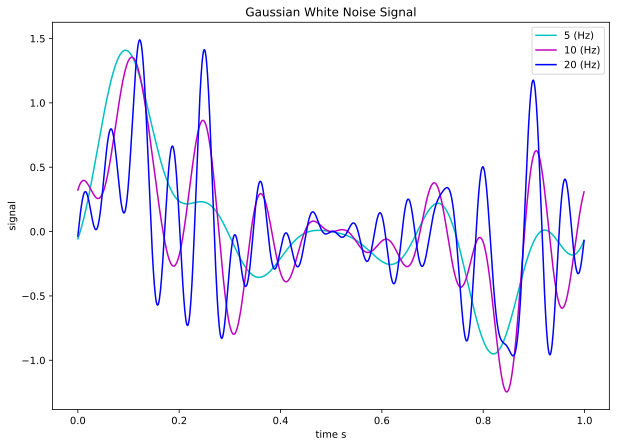

In [4]:
# ✍ 
T = 1
dt = 0.001
rms = 0.5
t = np.arange(0,T,dt)

limits = [5, 10, 20]
tss = [generate_signal(T, dt, rms, limit, 17717)[0] for limit in limits]
labels = [ "%s (Hz)" % limit for limit in limits]

plot_curves("Gaussian White Noise Signal", "time s", "signal", t ,tss, labels)

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

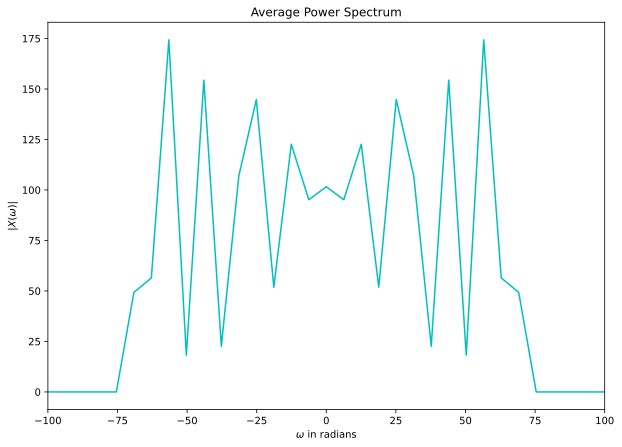

In [5]:
# ✍ 
numS = 100
total = 0
limit = 10
t = np.arange(0,T,dt)
N = len(t)
f = sorted(np.fft.fftfreq(N,dt))
genSig = [generate_signal(T, dt, rms, limit, np.random.randint(0, 100000))[1] for _ in range(numS)]
powerSpec = np.array([np.abs(genSig[0])])
radians = [2 * np.pi * freq for freq in f]

plot_curves("Average Power Spectrum", "$\omega$ in radians", "$|X(\omega)|$", radians ,powerSpec, x_lim = [-100,100])

## 1.2 Gaussian power spectrum noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

In [6]:
# ✍ 
def generate_signal_dps(T, dt, rms, bandwidth, seed):  #dps - different power spectrum
    np.random.seed(seed)    
    ts = np.arange(0,T,dt)
    N = len(ts)
    fr = np.fft.fftfreq(N, dt)
    fs = np.zeros(len(fr)).tolist()
    
    for i in range(len(fr)):
        std = np.exp(-np.power(fr[i], 2)/(np.power(bandwidth, 2))*2)
        if(std != 0 and fs[i] == 0):
            a = np.random.normal(scale = std)
            b = np.random.normal(scale = std)
            fs[i] = complex(a, b)
            fs[-i -1] = complex(a, -b)

    ts = np.fft.ifft(fs).real
    RMS = np.sqrt(np.power(ts,2).mean())
    ts = ts*(rms/RMS) #rescaling
    fs = np.fft.fft(ts)
    
    sorted_indices = sorted(range(len(fr)), key=lambda i: fr[i])
    fr = [fr[i] for i in sorted_indices]
    fs = [fs[i] for i in sorted_indices]
    return ts, fs

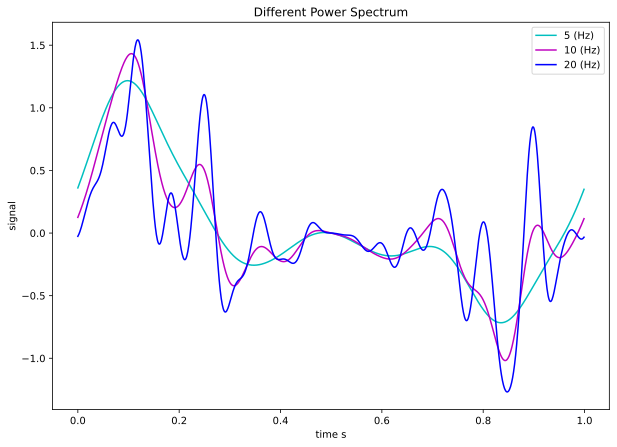

In [7]:
bandwidths = [5,10,20]
tss = [generate_signal_dps(T, dt, rms, b, 17717)[0] for b in bandwidths]
labels = [ "%s (Hz)" % b for b in bandwidths]

plot_curves('Different Power Spectrum', "time s", "signal", t ,tss, labels)  

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

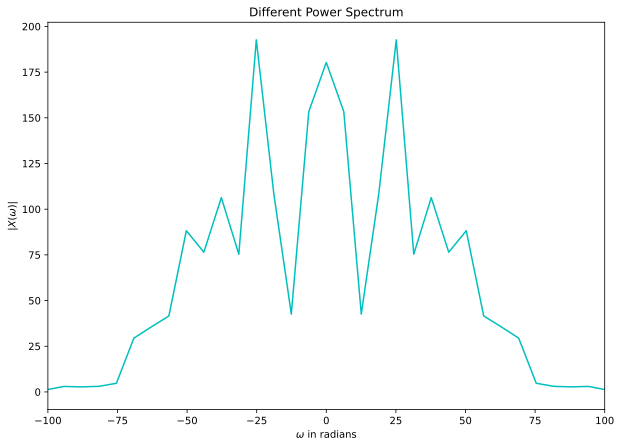

In [8]:
# ✍ 
bandwidth = 10

genSig = [generate_signal_dps(T, dt, rms, bandwidth, np.random.randint(0, 100000))[1] for _ in range(numS)]
powerSpec = np.array([np.abs(genSig[0])])
radians = [2 * np.pi * freq for freq in f]

plot_curves("Different Power Spectrum", "$\omega$ in radians", "$|X(\omega)|$", radians ,powerSpec, x_lim = [-100,100])

# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.

$$
J_{bias} = \frac{1}{1-\mathrm{e}^{\frac{min\_r\tau_{ref}-1}{\tau_{RC}min\_r}}}
$$

$$
\alpha  = \frac{1}{1-\mathrm{e}^{\frac{max\_r\tau_{ref}-1}{\tau_{RC}max\_r}}} - J_{bias}
$$

In [9]:
# ✍
def LIF_init_alpha_and_J_bias(min_rate,max_rate, encoder, tau_ref, tau_RC):
    J_bias = 1 /(1- np.exp((tau_ref*min_rate - 1)/(tau_RC * min_rate)))
    alpha = 1 /(1- np.exp((tau_ref*max_rate - 1)/(tau_RC * max_rate))) - J_bias
    return alpha, J_bias

In [10]:
def simulate_spikes(encoder, tau_ref, tau_RC, J_bias, alpha, x, dt):
    num_samples = len(x)
    voltages = np.zeros(num_samples)
    refractory_period = int(tau_ref / dt)
    refractory_countdown = 0
    for i in range(num_samples - 1):
        voltages[i + 1] = voltages[i] + (dt * (alpha * x[i] * encoder + J_bias - voltages[i]))/tau_RC #Euler's method
        if voltages[i + 1] < 0:
            voltages[i + 1] = 0
        elif refractory_countdown > 0:
            voltages[i + 1] = 0
            refractory_countdown -= 1
        elif voltages[i + 1] >= 1: #neuron "spikes"
            voltages[i + 1] = 1
            refractory_countdown = refractory_period
    spikes = [1 if voltage1 >= 1 else 0 for voltage1 in voltages]
    return voltages, spikes

In [11]:
T = 1
dt = 0.001
t = np.arange(0,T,dt)
tau_ref = 0.002
tau_RC = 0.02
min_rate = 40
max_rate = 150

number of spikes:
40


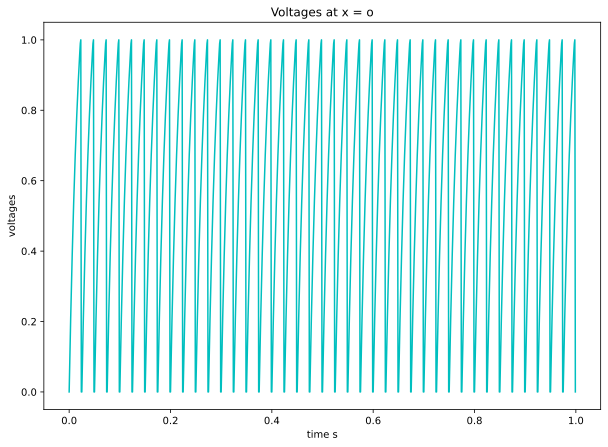

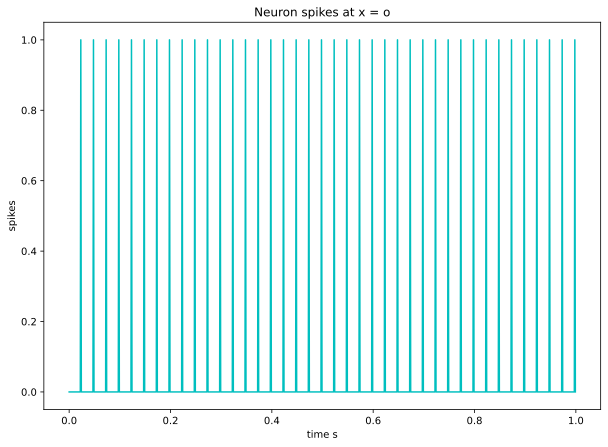

In [12]:
encoder = 1
alpha, J_bias = LIF_init_alpha_and_J_bias(min_rate,max_rate, encoder, tau_ref, tau_RC)
x = np.zeros(int(T/dt))
voltages, spikes = simulate_spikes(encoder, tau_ref, tau_RC, J_bias, alpha, x, dt)
numSpikes = sum(1 for spike in spikes if spike == 1)
plot_curves("Voltages at x = o", "time s", "voltages", t ,np.array([voltages]))
plot_curves("Neuron spikes at x = o", "time s", "spikes", t ,np.array([spikes]))  
print("number of spikes:")
print(numSpikes)

number of spikes:
143


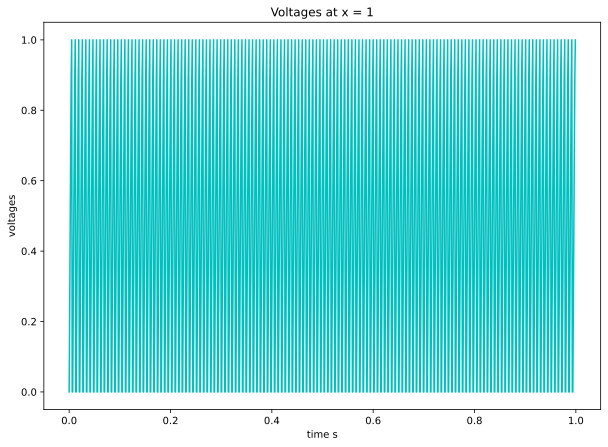

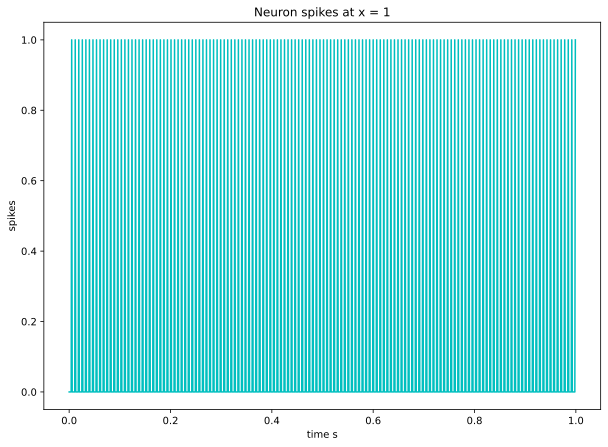

In [13]:
x = np.ones(int(T/dt))
voltages, spikes = simulate_spikes(encoder, tau_ref, tau_RC, J_bias, alpha, x, dt)
numSpikes = sum(1 for spike in spikes if spike == 1)
plot_curves("Voltages at x = 1", "time s", "voltages", t ,np.array([voltages]))
plot_curves("Neuron spikes at x = 1", "time s", "spikes", t ,np.array([spikes]))  
print("number of spikes:")
print(numSpikes)

**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?

✍ 
The result is accurate at x =0 (40 Hz), since we can observe exactly 40 spikes of the neuron. However, for x=1, the result is 143, which is close to 150. After many attempts to make this number more accurate, we found that the time step plays a significant role. So, if we increase the step to 2 ms, we will get only 125 spikes, and if, on the contrary, we halve it to half a millisecond, the result will be 149.

**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.

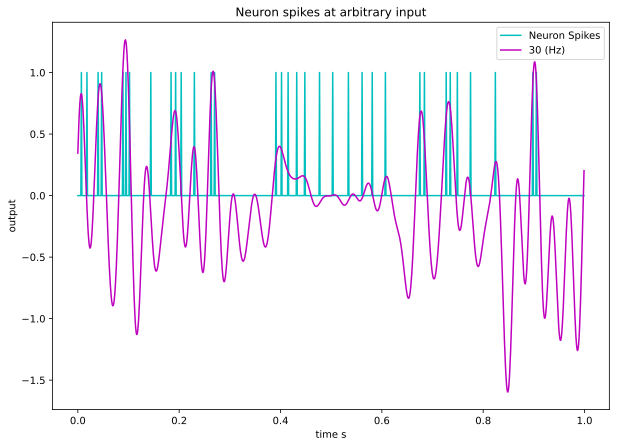

In [14]:
# ✍ 
limit = 30
ts, fs = generate_signal(T,dt,rms, limit,1852)
voltages, spikes = simulate_spikes(encoder, tau_ref, tau_RC, J_bias, alpha, ts, dt)
labeles = ["Neuron Spikes","%s (Hz)" % limit]
plot_curves("Neuron spikes at arbitrary input", "time s", "output", t ,np.array([spikes,ts]),labeles)

**d) Voltage over time.** Using the same $x(t)$ signal as in part *c)*, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.

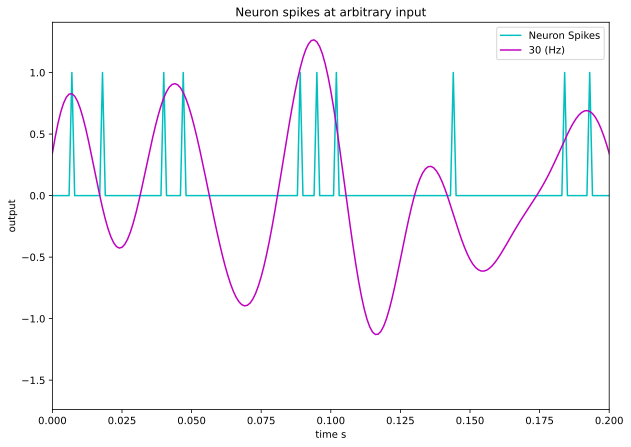

In [15]:
# 
plot_curves("Neuron spikes at arbitrary input", "time s", "output", t ,np.array([spikes,ts]),labeles, [0,0.2])

**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.

✍ 

# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).

number of spikes of the neuron with encoder 1:
40
number of spikes of the neuron with encoder -1:
40


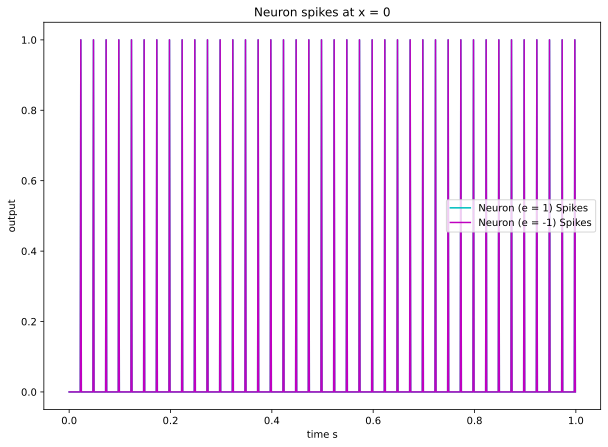

In [17]:
# ✍ 
encoder1 = 1
encoder2 = -1
alpha1, J_bias1 = LIF_init_alpha_and_J_bias(min_rate,max_rate, encoder1, tau_ref, tau_RC)
alpha2, J_bias2 = LIF_init_alpha_and_J_bias(min_rate,max_rate, encoder2, tau_ref, tau_RC)

x = np.zeros(int(T/dt))

voltages1, spikes1 = simulate_spikes(encoder1, tau_ref, tau_RC, J_bias1, alpha1, x, dt)
voltages2, spikes2 = simulate_spikes(encoder2, tau_ref, tau_RC, J_bias2, alpha2, x, dt)

labels = ["Neuron (e = 1) Spikes","Neuron (e = -1) Spikes"]
plot_curves("Neuron spikes at x = 0", "time s", "output", t ,np.array([spikes1,spikes2]),labels)

numSpikes1 = sum(1 for spike in spikes1 if spike == 1)
print("number of spikes of the neuron with encoder 1:")
print(numSpikes1)

numSpikes2 = sum(1 for spike in spikes2 if spike == 1)
print("number of spikes of the neuron with encoder -1:")
print(numSpikes2)


number of spikes of the neuron with encoder 1:
143
number of spikes of the neuron with encoder -1:
0


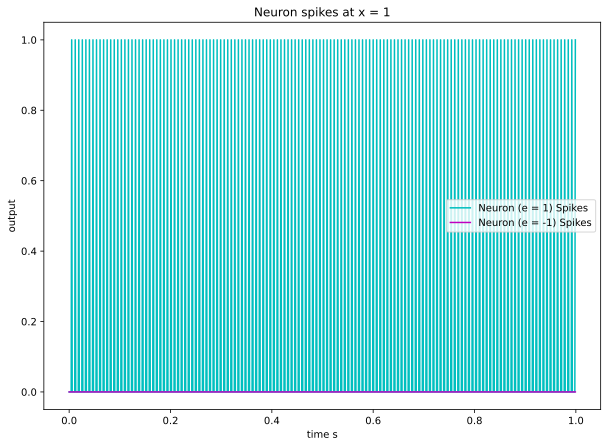

In [18]:
x = np.ones(int(T/dt))

voltages1, spikes1 = simulate_spikes(encoder1, tau_ref, tau_RC, J_bias1, alpha1, x, dt)
voltages2, spikes2 = simulate_spikes(encoder2, tau_ref, tau_RC, J_bias2, alpha2, x, dt)

labels = ["Neuron (e = 1) Spikes","Neuron (e = -1) Spikes"]
plot_curves("Neuron spikes at x = 1", "time s", "output", t ,np.array([spikes1,spikes2]),labels)

numSpikes1 = sum(1 for spike in spikes1 if spike == 1)
print("number of spikes of the neuron with encoder 1:")
print(numSpikes1)

numSpikes2 = sum(1 for spike in spikes2 if spike == 1)
print("number of spikes of the neuron with encoder -1:")
print(numSpikes2)

**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.

number of spikes of the neuron with encoder 1:
40
number of spikes of the neuron with encoder -1:
40


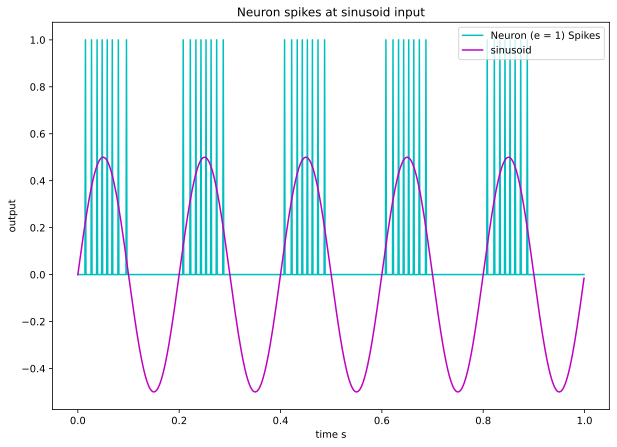

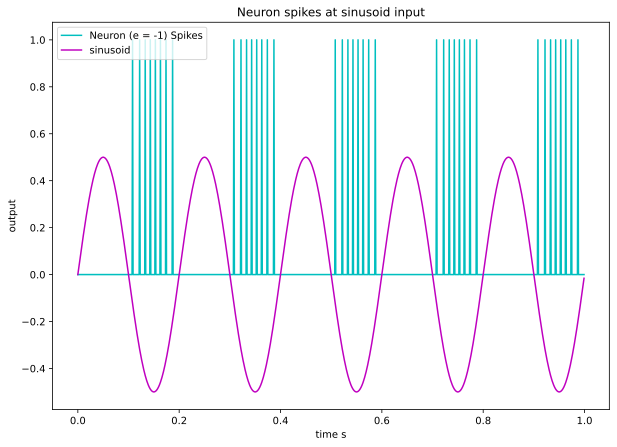

In [19]:
# ✍ 
x = np.sin(10*np.pi*t)/2

voltages1, spikes1 = simulate_spikes(encoder1, tau_ref, tau_RC, J_bias1, alpha1, x, dt)
voltages2, spikes2 = simulate_spikes(encoder2, tau_ref, tau_RC, J_bias2, alpha2, x, dt)

labels = ["Neuron (e = 1) Spikes","sinusoid"]
plot_curves("Neuron spikes at sinusoid input", "time s", "output", t ,np.array([spikes1,x]),labels)

numSpikes1 = sum(1 for spike in spikes1 if spike == 1)
print("number of spikes of the neuron with encoder 1:")
print(numSpikes1)

labels = ["Neuron (e = -1) Spikes","sinusoid"]
plot_curves("Neuron spikes at sinusoid input", "time s", "output", t ,np.array([spikes2,x]),labels)

numSpikes2 = sum(1 for spike in spikes2 if spike == 1)
print("number of spikes of the neuron with encoder -1:")
print(numSpikes2)

**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.

number of spikes of the neuron with encoder 1:
64
number of spikes of the neuron with encoder -1:
122


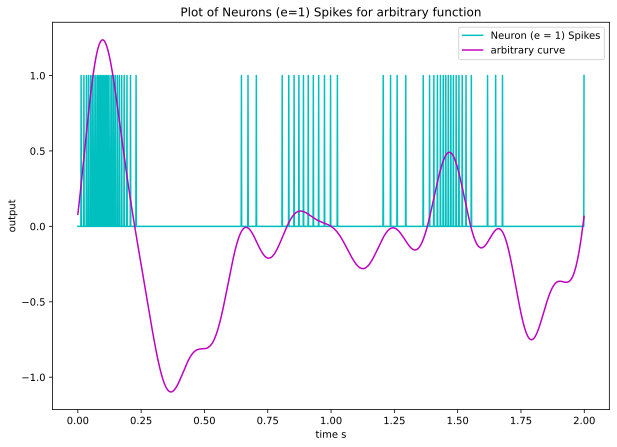

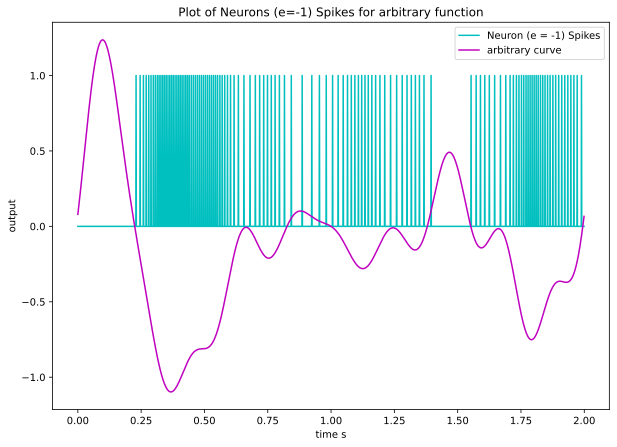

In [20]:
# ✍ 
T = 2
dt = 0.001
t = np.arange(0,T,dt)
rms = 0.5
limit = 5
ts, fs = generate_signal(T,dt,rms, limit,18852)

voltages1, spikes1 = simulate_spikes(encoder1, tau_ref, tau_RC, J_bias1, alpha1, ts, dt)
voltages2, spikes2 = simulate_spikes(encoder2, tau_ref, tau_RC, J_bias2, alpha2, ts, dt)

labels = ["Neuron (e = 1) Spikes","arbitrary curve"]
plot_curves("Plot of Neurons (e=1) Spikes for arbitrary function", "time s", "output", t ,np.array([spikes1,ts]),labels)

numSpikes1 = sum(1 for spike in spikes1 if spike == 1)
print("number of spikes of the neuron with encoder 1:")
print(numSpikes1)

labels = ["Neuron (e = -1) Spikes","arbitrary curve"]
plot_curves("Plot of Neurons (e=-1) Spikes for arbitrary function", "time s", "output", t ,np.array([spikes2,ts]),labels)

numSpikes2 = sum(1 for spike in spikes2 if spike == 1)
print("number of spikes of the neuron with encoder -1:")
print(numSpikes2)

# 4. Computing an optimal filter

**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).

In [21]:
def compute_optimal_filter(
        # Signal generated from your white noise generator
        x,
        # Fourier coefficients from your white noise generator
        X,
        # Spike train from the previous part
        spikes,
        # Time step size
        dt=1e-3
    ):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # Calculate the total number of time points.
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2              
    assert spikes.shape[1] == Nt

    # Calculate the total duration of the signal.
    T = Nt * dt

    # Generate a time domain for the signal.
    ts = np.arange(Nt) * dt - T / 2.0

     # Generate a frequency domain for the signal.
    fs = np.arange(Nt) / T - Nt / (2.0 * T)

    # Calculate angular frequency values.
    omega = fs * 2.0 * np.pi

    #Compute the time difference between spike times.
    r = spikes[0] - spikes[1]

    #Calculate the Fourier transform of the time difference.
    R = np.fft.fftshift(np.fft.fft(r))

    # Define a time constant for the filter.
    sigma_t = 25e-3

    #Generate the filter in the frequency domain.
    W2 = np.exp(-omega**2*sigma_t**2)
    W2 = W2 / sum(W2)
    
    # Convolve the cross-power spectrum of the input and time difference with the filter.
    CP = X*R.conjugate()
    WCP = np.convolve(CP, W2, 'same')

    # Convolve the power spectrum of the time difference with the filter.
    RP = R*R.conjugate()
    WRP = np.convolve(RP, W2, 'same')

    # Convolve the power spectrum of the input signal with the filter.
    XP = X*X.conjugate()
    WXP = np.convolve(XP, W2, 'same')

    # Calculate the optimal filter H
    H = WCP / WRP

    # Calculate the impulse response of the filter h
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # Calculate the filtered signal in the frequency domain
    XHAT = H*R

    # Calculate the filtered signal in the time domain
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP

**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.

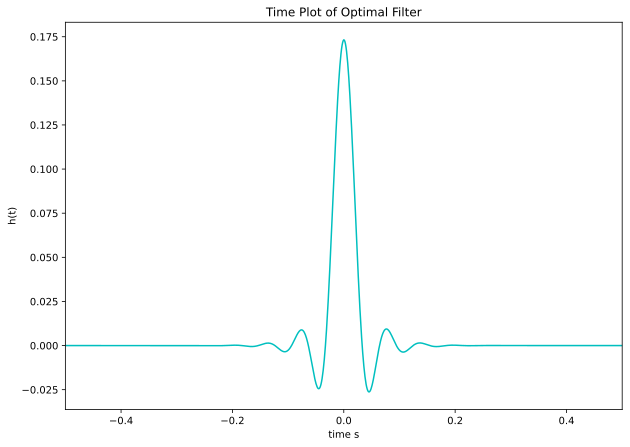

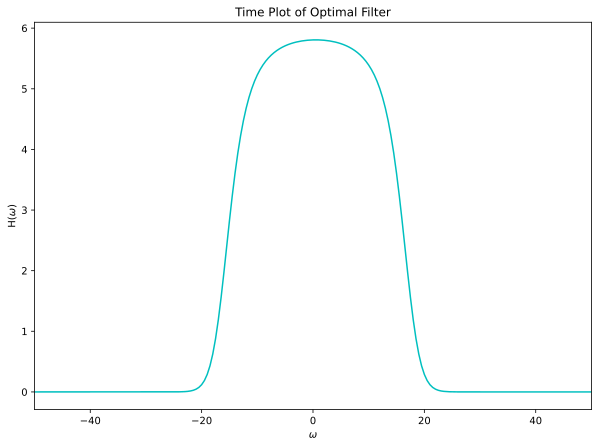

In [22]:
# ✍ 
spikes = np.array([spikes1, spikes2])
ts_my = np.array(ts)
fs_my = np.array(fs)

ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(ts_my, fs_my, spikes)

plot_curves("Time Plot of Optimal Filter", "time s", "h(t)", ts ,np.array([h]),x_lim = [-0.5,0.5])  
plot_curves("Time Plot of Optimal Filter", "$\omega$", "H($\omega$)", fs ,np.array([H.real]),x_lim = [-50,50])  

**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).

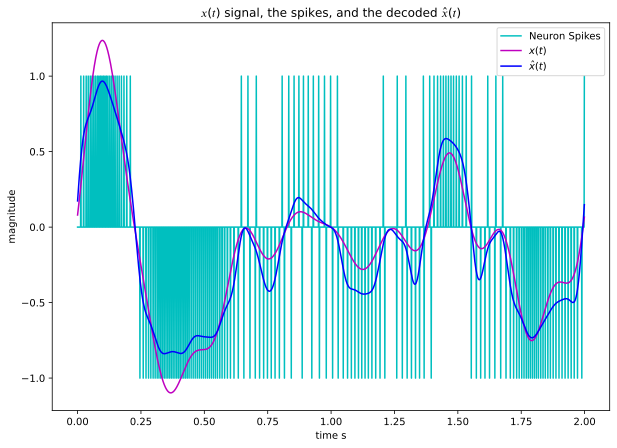

In [23]:
# ✍ 
sp = np.array(spikes1)- np.array(spikes2)
labels = ["Neuron Spikes","$x(t)$","$\hat{x}(t)$"]
plot_curves("$𝑥(𝑡)$ signal, the spikes, and the decoded $𝑥̂(𝑡)$", "time s", "magnitude", t ,np.array([sp,ts_my,xhat]),labels)  

**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).

# ✍ 
$|R(\omega)| = \sqrt{R(\omega) \overline{R(\omega)}}$

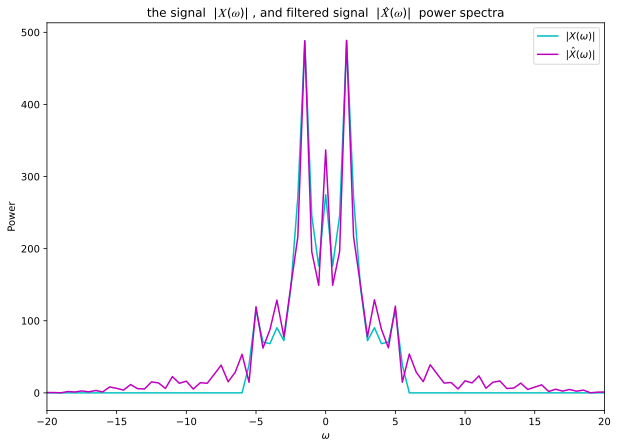

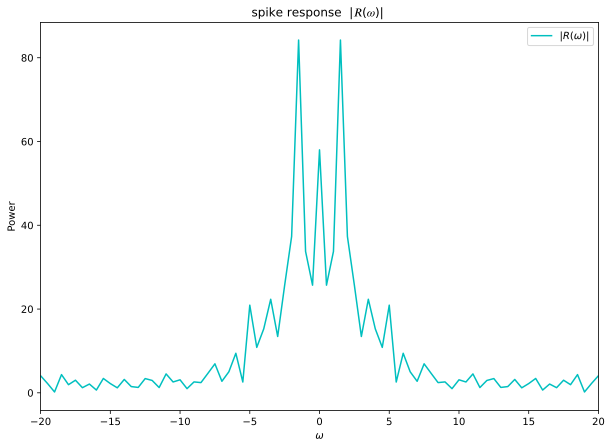

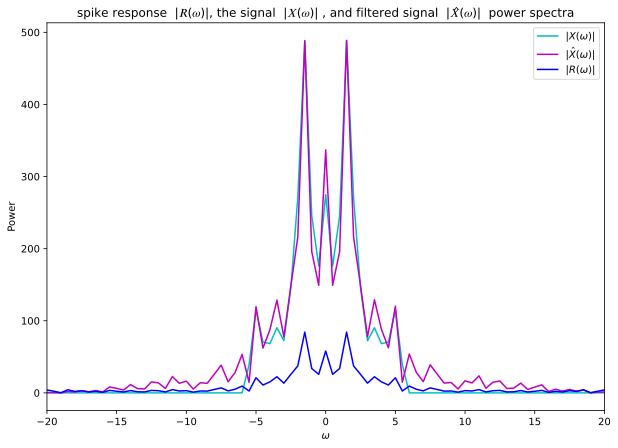

In [24]:
# ✍ 
g1 = np.sqrt(XP).real
g2 = np.sqrt(XHAT*XHAT.conjugate()).real     
r = np.sqrt(R*R.conjugate()).real

labels = ["$|X(\omega)|$","$|\hat{X}(\omega)|$"]
plot_curves("the signal  $|𝑋(𝜔)|$ , and filtered signal  $|𝑋̂(𝜔)|$  power spectra", '$\omega$', 'Power', fs\
            ,np.array([g1,g2]),labels, [-20,20])  

labels = ["$|R(\omega)|$"]
plot_curves("spike response  $|𝑅(𝜔)|$ ", '$\omega$', 'Power', fs\
            ,np.array([r]),labels, [-20,20])  

labels = ["$|X(\omega)|$","$|\hat{X}(\omega)|$","$|R(\omega)|$"]
plot_curves("spike response  $|𝑅(𝜔)|$, the signal  $|𝑋(𝜔)|$ , and filtered signal  $|𝑋̂(𝜔)|$  power spectra", '$\omega$', 'Power',\
           fs ,np.array([g1,g2,r]),labels, [-20,20])  

**e) Discussion.** How do these spectra relate to the optimal filter?

✍ Optimal filter: 
$
H(\omega) = \frac{X(\omega) \overline{R}(\omega)}{|R(\omega)|^{2}}
$,
where $R(\omega)$ is power spectra of the neurons responses, and $X(\omega)$ is an input signal in the frequency domain.

**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.

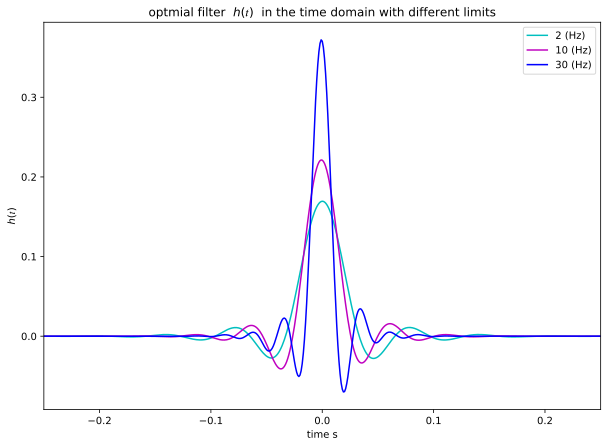

In [25]:
# ✍ 
limits = [2,10,30]
ht = []
for i in range(len(limits)):
    ts_, fs_ = generate_signal(T,dt,rms, limits[i],18852)
    voltages11, spikes11 = simulate_spikes(encoder1, tau_ref, tau_RC, J_bias1, alpha1, ts_, dt)
    voltages22, spikes22 = simulate_spikes(encoder2, tau_ref, tau_RC, J_bias2, alpha2, ts_, dt)    
    spike_ = np.array([spikes11, spikes22])
    ts_ = np.array(ts_)
    fs_ = np.array(fs_)
    ts1, fs1, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(ts_, fs_, spike_)
    ht.append(h)
labels = [ "%s (Hz)" % limit for limit in limits]
plot_curves('optmial filter  $ℎ(𝑡)$  in the time domain with different limits', "time s", "$ℎ(𝑡)$",\
            ts1 ,ht, labels,[-0.25,0.25])  

**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?

✍Raising the input signal limit leads to more pronounced oscillations in the optimal filter, causing the primary spike to narrow on the x-axis and grow in magnitude, primarily due to heightened sensitivity to higher-frequency components. On the other hand, increasing the frequency limit of the signal results in a compressed temporal filter, bringing decaying oscillations closer to zero with increased strength. The net effect is a complex interplay between signal limits and filter behavior, underscoring the crucial roles of frequency and sensitivity in signal processing.

# Using post-synaptic currents as a filter


**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.

In [26]:
# ✍ 
def post_synaptic_filter(n,tau,t):
    h=t**n*np.exp(-t/tau)
    h=h/np.linalg.norm(h)
    return h

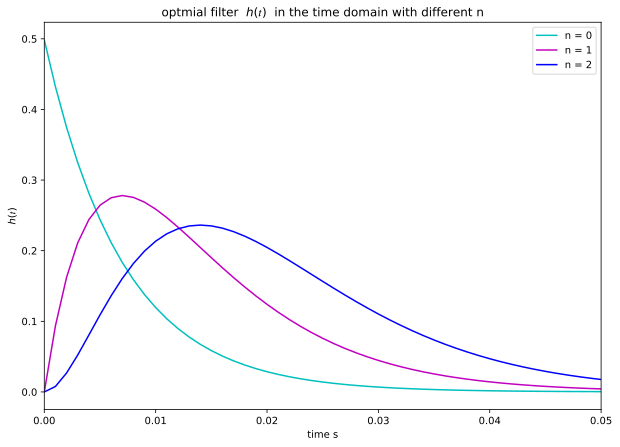

In [27]:
T = 2 
dt = 0.001
t = np.arange(0,T,dt) 
tau = 0.007
n = [0,1,2]
ht = []
for i in range(len(n)):
    h = post_synaptic_filter(n[i],tau,t)
    ht.append(h)

labels = [ "n = %s" % ni for ni in n]
plot_curves('optmial filter  $ℎ(𝑡)$  in the time domain with different n', "time s", "$ℎ(𝑡)$",\
            t ,ht, labels,[0,0.05])  

**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?

✍ Increasing the parameter "n" in the filter seems to have several effects. It smoothes the filter. The shift of peak is likely to result in a delay in registering spikes, causing a slight delay in the post-filter output compared to the input. 

**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.

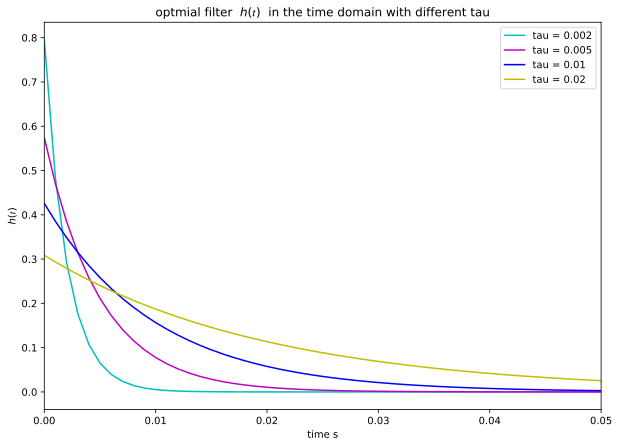

In [28]:
# ✍ 
tau = [0.002,0.005,0.01,0.02]
n = 0

ht = []
for i in range(len(tau)):
    h = post_synaptic_filter(n,tau[i],t)
    ht.append(h)

labels = [ "tau = %s" % taui for taui in tau]
plot_curves('optmial filter  $ℎ(𝑡)$  in the time domain with different tau', "time s", "$ℎ(𝑡)$",\
            t ,ht, labels,[0,0.05])  

**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?

✍ Increasing the parameter "tau" is likely to result in more signal smoothing as it levels out the filter curve over a longer time period. Additionally, raising the value of "tau" can lead to a reduction in the magnitude of the decoded signal. 

**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

In [29]:
def get_decoder(spikes, h, x):
    n = len(x)
    A_T = []

    for s in spikes:
        conv_result = np.zeros(len(spikes[0]))
        for i in range(len(s)):
            for j in range(len(h)):
                if i + j < len(spikes[0]):
                    conv_result[i + j] += s[i] * h[j]
        A_T.append(conv_result)

    A = np.matrix(A_T).T
    x = np.array(x).reshape(-1, 1)

    upsilon = np.dot(A_T, x) / n
    gamma = np.dot(A_T, A) / n

    d = np.linalg.pinv(gamma).dot(upsilon)

    return d

def decode(spikes, h, d):
    r = np.zeros(len(spikes[0]))
    n_spikes = len(spikes[0])
    n_h = len(h)

    for i in range(len(d)):
        for t in range(n_spikes):
            for j in range(n_h):
                if t - j >= 0:
                    r[t] += d[i] * h[j] * spikes[i][t - j]
    return r


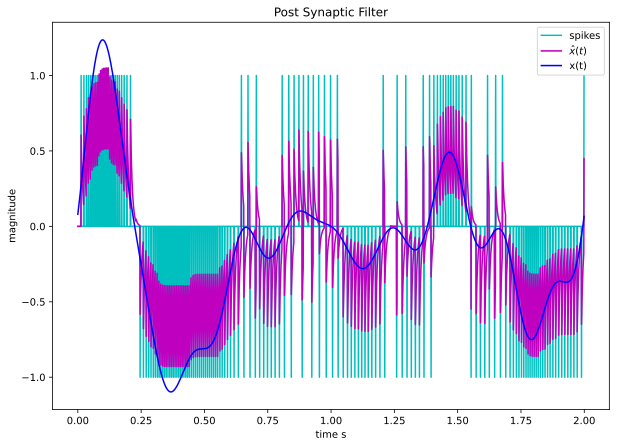

In [30]:
# ✍  
limit = 5
ts, fs = generate_signal(T,dt,rms, limit,18852)

voltages1, spikes1 = simulate_spikes(encoder1, tau_ref, tau_RC, J_bias1, alpha1, ts, dt)
voltages2, spikes2 = simulate_spikes(encoder2, tau_ref, tau_RC, J_bias2, alpha2, ts, dt)
spikes =  np.array([spikes1,spikes2])

tau = 0.007
n = 0
h = post_synaptic_filter(n,tau,t)
H = np.fft.fftshift(np.fft.fft(h))

d=get_decoder(spikes,h,ts)
xhat=decode(spikes,h,d)

spikes = np.array(spikes1)-np.array(spikes2)
labels = [ "spikes","$\hat{x}(t)$","x(t)"]
f = np.array([spikes,xhat,ts])
plot_curves('Post Synaptic Filter', "time s", "magnitude",t ,f, labels)  

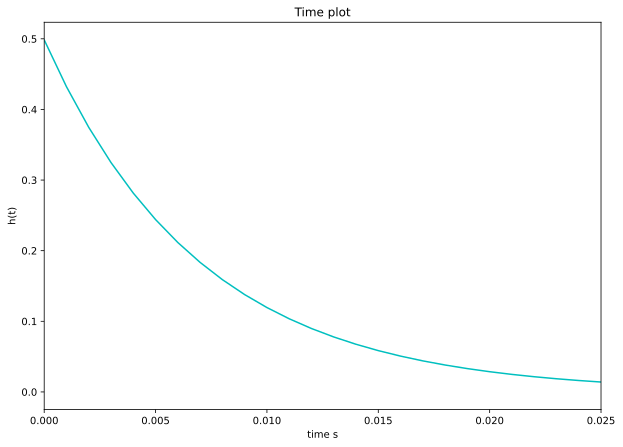

In [31]:
plot_curves('Time plot', "time s", "h(t)",t ,np.array([h]), x_lim =[0,0.025])

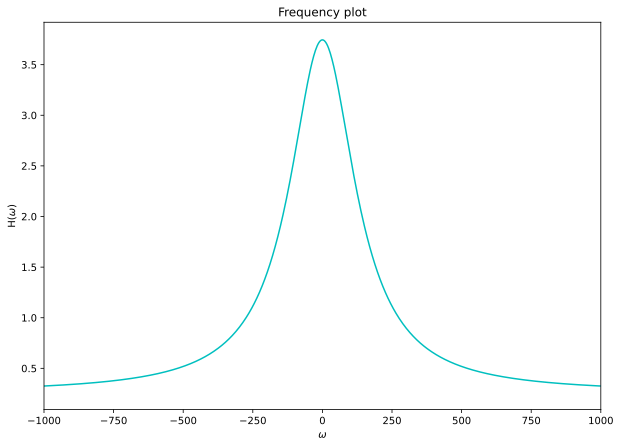

In [32]:
Nt = len(ts)
freq = np.arange(Nt)/T - Nt/(2.0*T)   
f = freq*2*np.pi 
plot_curves('Frequency plot', "$\omega$", "H($\omega$)",f ,np.array([H.real]), x_lim =[-1000,1000])

**f) Decoding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

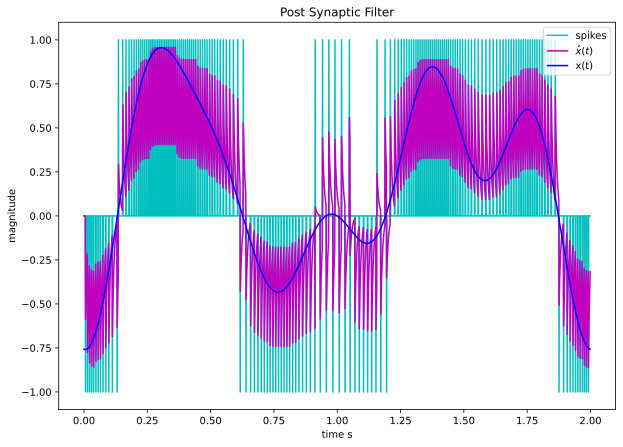

In [33]:
# ✍ 
limit = 2
ts, fs = generate_signal(T,dt,rms, limit,1882)

voltages1, spikes1 = simulate_spikes(encoder1, tau_ref, tau_RC, J_bias1, alpha1, ts, dt)
voltages2, spikes2 = simulate_spikes(encoder2, tau_ref, tau_RC, J_bias2, alpha2, ts, dt)
spikes =  np.array([spikes1,spikes2])

tau = 0.007
n = 0
xhat=decode(spikes,h,d)

spikes = np.array(spikes1)-np.array(spikes2)
labels = [ "spikes","$\hat{x}(t)$","x(t)"]
f = np.array([spikes,xhat,ts])
plot_curves('Post Synaptic Filter', "time s", "magnitude",t ,f, labels)  

**g) Discussion.** How do the decodings from e) and f) compare? Explain.

✍ 
When comparing the performance of decoders, it's evident that a decoder trained on a specific signal tends to yield more accurate results for that signal. This is reasonable, as the decoder's training data directly influences its accuracy. However, in some cases, such as with high-frequency signals, the decoder might overestimate signal magnitudes. Interestingly, using a signal to generate its own decoder can still result in some overestimation, suggesting that the properties of the filter play a significant role in these discrepancies. Nevertheless, the overall performance of the decoders demonstrates their effectiveness in approximating signals 